# Gene Content Figure

In [1]:
library(tidyverse)
library(ggh4x)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.5.1     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
input_data <- readxl::read_excel("./data/Supplementary_Table_3.xlsx")

In [4]:
selected <- c("fadD","fadD19","fadK","acd","dcaA","fadE26","fadE27","fadE34","caiA","paaF","ECI1_2","caiD","caiD|fadB","HSD17B10","paaJ","quiP","pldB","tesA","napepld","COG3621","phyH","gloA","nahG","nfnB","tfdA","catE","nahD","hcaD","baiB","17-beta-hsd","kstD","kshA","hsaA","hsaC","hsaD","fadD3","tesI","cyp125","manB","bglX","nagZ","malZ","sga1","arsB","aslA","cirA","cirA|fepA","btuB","btuB|fepA","fepA","fecA","fhuE","fiu","amtB","pstA","pstB","pstC","pstS","pit","sul1","tauE","gltB1/B2/B3","glnA","gdhA","cysE","cysK","dmdA","metB","ggt","pepB","tauD")

In [5]:
# Get relative sizes for facet grids
family_sizes <- c(1.0, 0.5, 0.5, 0.6)
category_sizes <- input_data %>%
    filter(`gene name` %in% selected) %>%
    count(Group) %>%
    pull(n)

In [6]:
# Family colors
family_colors <- c(Suzuki = "#F17C6C", `CHAB-I-7` = "#F8CB9A", RedeBAC7D11 = "#E5EFBA", SAR156 = "#7AACA1")
strip <- strip_themed(background_x = ggh4x::elem_list_rect(fill = c(family_colors[[1]], family_colors[[2]],
                                                                           family_colors[[3]], family_colors[[4]])))

In [7]:
cat_order <- input_data %>%
    distinct(Group) %>%
    pull()

Warning message:
“Removed 704 rows containing missing values or values outside the scale range
(`geom_point()`).”


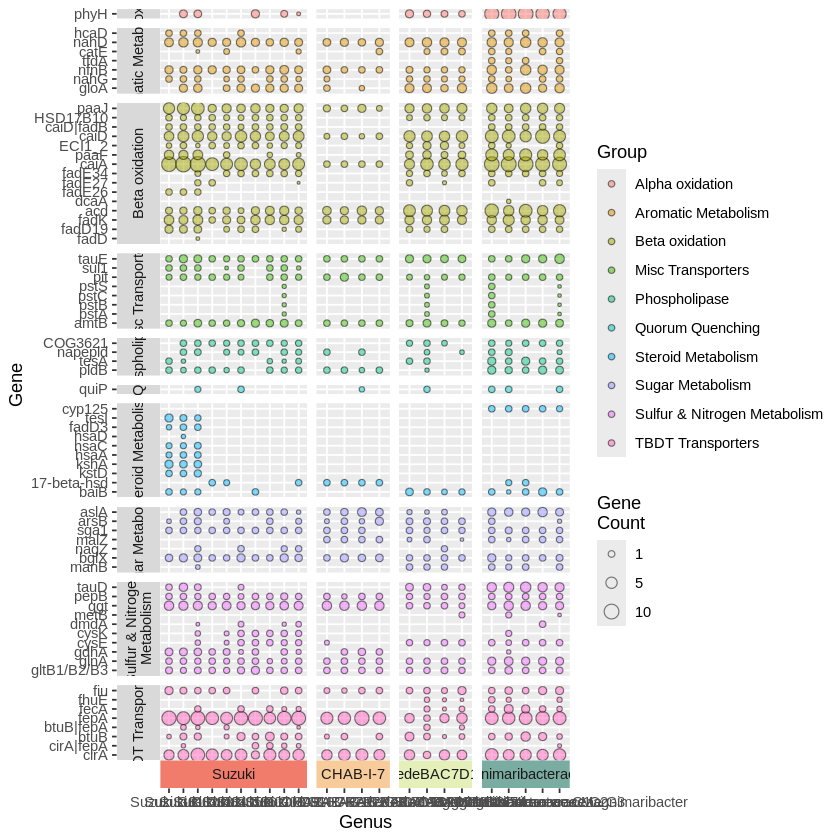

In [13]:
family_names <- c("Suzuki", "CHAB-I-7", "RedeBAC7D11", "Magnimaribacteraceae")

input_data %>%
    filter(`gene name` %in% selected) %>%
    select(-HIMB083) %>%
    select(-c("Subgroup", "accession", "description")) %>%
    select(!ends_with("Proportion")) %>%
    pivot_longer(!c("Group", "gene name"), names_to = "Entry", values_to = "Mean") %>%
    mutate(Family = str_replace(Entry, " G.*", "")) %>%
    mutate(Family = str_replace(Family, " \\(.*", "")) %>%
    mutate(Family = str_replace(Family, "Magnimaribacter$", "Magnimaribacteraceae")) %>%
    mutate(Family = str_replace(Family, "HIMB1674", "Magnimaribacteraceae")) %>%
    mutate(Family = factor(Family, levels = family_names)) %>%
    mutate(Genus = str_replace(Entry, "\\(\\d+\\) Mean", "")) %>%
    mutate(Genus = str_replace(Genus, "Magnimaribacter\\s*$", "Magnimaribacteraceae Magnimaribacter")) %>%
    ggplot(aes(x = Genus,
               y = factor(`gene name`, levels = input_data %>% pull(`gene name`) %>% unique()),
               size = ifelse(Mean==0, NA, Mean),
               fill = Group)) + 
    geom_point(alpha=0.5, shape=21, color="black") + 
    ggh4x::facet_grid2(Group ~ Family, scales="free", switch = "both", strip = strip,
                           labeller = label_wrap_gen(width = 20, multi_line = TRUE)) +
    ggh4x::force_panelsizes(cols = family_sizes, rows = category_sizes) +
    scale_size(name = "Gene\nCount", breaks = c(1, 5, 10), labels = c("1", "5", "10"), range = c(0.5,4)) + 
    ylab("Gene") + 
    xlab("Genus")

In [ ]:
input_data